In [1]:
import warnings
warnings.filterwarnings("ignore")
import random
random.seed(100)

import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split, cross_val_score, GridSearchCV
from xgboost import XGBClassifier
from xgboost import plot_importance
import statsmodels.formula.api as sm
import xgboost as xgb

import datasets as k

FileNotFoundError: File b'Study_A.csv' does not exist

In [2]:
DataSet_A = pd.read_csv("Study_A.csv")
DataSet_B = pd.read_csv("Study_B.csv")
DataSet_C = pd.read_csv("Study_C.csv")
DataSet_D = pd.read_csv("Study_D.csv")
DataSet_E = pd.read_csv("Study_E.csv")

DataSet_E["LeadStatus"] = None
DataSet_All = pd.concat([DataSet_A, DataSet_B, DataSet_C, DataSet_D, DataSet_E])

In [3]:
DataSet_All["POSS"] = DataSet_All.iloc[:, 8:15].sum(axis=1)
DataSet_All["NEGG"] = DataSet_All.iloc[:, 15:22].sum(axis=1)
DataSet_All["GENR"] = DataSet_All.iloc[:, 22:38].sum(axis=1)
DataSet_All["COMP"] = DataSet_All["POSS"] - DataSet_All["NEGG"]

DataSet_All_Long = DataSet_All[DataSet_All["VisitDay"]>=90]
DataSet_All_Short = DataSet_All[DataSet_All["VisitDay"]<90]

In [4]:
def find_diff(DataSet, obser_t):
    patient_id = DataSet.iloc[0]["PatientID"]
    last_obser = None
    last_day = None
    change_array = {"Control":[], "Treatment":[]}
    
    for i in range(DataSet.shape[0]):
        if last_obser == None:
            last_obser = DataSet.iloc[i][obser_t]
            last_day = DataSet.iloc[i]["VisitDay"]
            patient_id = DataSet.iloc[i]["PatientID"]           
        elif patient_id == DataSet.iloc[i]["PatientID"]:
             #print((DataSet.iloc[i]["VisitDay"] - last_day) / float(last_obser - DataSet.iloc[i][obser_t]))
            if (DataSet.iloc[i]["VisitDay"] != last_day):
                change_array[DataSet.iloc[i]["TxGroup"]] += [float(last_obser - DataSet.iloc[i][obser_t]) / (DataSet.iloc[i]["VisitDay"] - last_day)]
            last_obser = DataSet.iloc[i][obser_t]
            last_day = DataSet.iloc[i]["VisitDay"]         
        else:
            last_obser = DataSet.iloc[i][obser_t]
            patient_id = DataSet.iloc[i]["PatientID"]
            last_day = DataSet.iloc[i]["VisitDay"]
    change_array["Control"] = np.array(change_array["Control"])
    change_array["Treatment"] = np.array(change_array["Treatment"])        
    return change_array

In [5]:
def SimpleMeanMovementPTesting(DataSet):
    ChangeDict_All = find_diff(DataSet, "PANSS_Total")
    print("PANSS_Total")
    print("MEAN:")
    print((ChangeDict_All["Treatment"]).mean(), (ChangeDict_All["Control"]).mean())
    print("T-TEST:")
    print(stats.ttest_ind(ChangeDict_All["Treatment"],ChangeDict_All["Control"]))
    ChangeDict_All = find_diff(DataSet, "POSS")
    print("POSS")
    print("MEAN:")
    print((ChangeDict_All["Treatment"]).mean(), (ChangeDict_All["Control"]).mean())
    print("T-TEST:")
    print(stats.ttest_ind(ChangeDict_All["Treatment"],ChangeDict_All["Control"]))
    ChangeDict_All = find_diff(DataSet, "NEGG")
    print("NEGG")
    print("MEAN:")
    print((ChangeDict_All["Treatment"]).mean(), (ChangeDict_All["Control"]).mean())
    print("T-TEST:")
    print(stats.ttest_ind(ChangeDict_All["Treatment"],ChangeDict_All["Control"]))
    ChangeDict_All = find_diff(DataSet, "GENR")
    print("GENR")
    print("MEAN:")
    print((ChangeDict_All["Treatment"]).mean(), (ChangeDict_All["Control"]).mean())
    print("T-TEST:")
    print(stats.ttest_ind(ChangeDict_All["Treatment"],ChangeDict_All["Control"]))
    ChangeDict_All = find_diff(DataSet, "COMP")
    print("COMP")
    print("MEAN:")
    print((ChangeDict_All["Treatment"]).mean(), (ChangeDict_All["Control"]).mean())
    print("T-TEST:")
    print(stats.ttest_ind(ChangeDict_All["Treatment"],ChangeDict_All["Control"]))
    return True

In [6]:
# Over 90 days
SimpleMeanMovementPTesting(DataSet_All_Long)

PANSS_Total
MEAN:
0.04698912664863048 0.03468947900246608
T-TEST:
Ttest_indResult(statistic=0.5556970399644168, pvalue=0.578434573610372)
POSS
MEAN:
0.010783449584150633 0.0038102687531378367
T-TEST:
Ttest_indResult(statistic=0.9986511311772542, pvalue=0.3179959741926303)
NEGG
MEAN:
0.009086992525855146 0.013058404659184522
T-TEST:
Ttest_indResult(statistic=-0.7034601700247184, pvalue=0.48179088039116325)
GENR
MEAN:
0.027118684538624697 0.017820805590143714
T-TEST:
Ttest_indResult(statistic=0.7448619629841454, pvalue=0.4563785358008079)
COMP
MEAN:
0.0016964570582954858 -0.009248135906046687
T-TEST:
Ttest_indResult(statistic=1.641321923422913, pvalue=0.10077258139365106)


True

In [7]:
# Less than 90 days
SimpleMeanMovementPTesting(DataSet_All_Short)

PANSS_Total
MEAN:
0.32361296460178696 0.3401329834564672
T-TEST:
Ttest_indResult(statistic=-0.8324841102001396, pvalue=0.405154859140086)
POSS
MEAN:
0.11156039466269299 0.11607997481604225
T-TEST:
Ttest_indResult(statistic=-0.6343324893369096, pvalue=0.52587781007945)
NEGG
MEAN:
0.0590583162391867 0.06134845586714292
T-TEST:
Ttest_indResult(statistic=-0.3774516324802083, pvalue=0.7058457044238515)
GENR
MEAN:
0.15299425369990727 0.16270455277328205
T-TEST:
Ttest_indResult(statistic=-0.8787065959620642, pvalue=0.37958068205514783)
COMP
MEAN:
0.052502078423506286 0.05473151894889932
T-TEST:
Ttest_indResult(statistic=-0.2902940297659159, pvalue=0.7715970937135274)


True

In [8]:
# All Data
SimpleMeanMovementPTesting(DataSet_All)

PANSS_Total
MEAN:
0.1984569855142746 0.2034089176277427
T-TEST:
Ttest_indResult(statistic=-0.3631195063185887, pvalue=0.7165195091840634)
POSS
MEAN:
0.0652193851683668 0.06595045992280872
T-TEST:
Ttest_indResult(statistic=-0.15619442602055378, pvalue=0.8758813704290924)
NEGG
MEAN:
0.0371588547290111 0.03945087836761666
T-TEST:
Ttest_indResult(statistic=-0.5890565256271992, pvalue=0.5558301089383373)
GENR
MEAN:
0.0960787456168967 0.0980075793373173
T-TEST:
Ttest_indResult(statistic=-0.25341848159178404, pvalue=0.7999474914807111)
COMP
MEAN:
0.028060530439355694 0.026499581555192053
T-TEST:
Ttest_indResult(statistic=0.3234235996002911, pvalue=0.7463778917087067)


True

# Treatment group

In [3]:
x,y,e = k.q4()
data = pd.concat([x,e], axis=0)

NameError: name 'k' is not defined

In [4]:
sns.scatterplot("VisitDay", "PANSS_Total", data=data, hue="TxGroup")

NameError: name 'data' is not defined

# Regression with variables TxGroup and Visit Day ~ PANSS Total

In [32]:
cols = ["TxGroup",'VisitDay']
datax = data[cols]
datay = data["PANSS_Total"]

In [33]:
#Normalizing data
datax =(datax-datax.mean())/datax.std()
results = sm.OLS(datay, datax).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            PANSS_Total   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     256.5
Date:                Tue, 13 Aug 2019   Prob (F-statistic):          6.67e-111
Time:                        17:54:35   Log-Likelihood:            -1.3073e+05
No. Observations:               22909   AIC:                         2.615e+05
Df Residuals:                   22907   BIC:                         2.615e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TxGroup        0.0852      0.481      0.177      0.8

In [35]:
cols = ["TxGroup",'VisitDay', 'Country_Mean', 'Rater_Mean', 'Site_Mean']
datax = data[cols]
datay = data["PANSS_Total"]
#Normalizing data
datax =(datax-datax.mean())/datax.std()
results = sm.OLS(datay, datax).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            PANSS_Total   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     169.2
Date:                Tue, 13 Aug 2019   Prob (F-statistic):          2.23e-177
Time:                        17:54:51   Log-Likelihood:            -1.3056e+05
No. Observations:               22909   AIC:                         2.611e+05
Df Residuals:                   22904   BIC:                         2.612e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
TxGroup          0.2600      0.478      0.544   

# Regression with interaction variables and predicting each score

In [2]:
cols = ["TxGroup",'VisitDay', 'Country_Mean', 'Rater_Mean', 'Site_Mean']
datax = data[cols]
scores =['P5', 'N6', 'G3', 'G5', 'Bipolar_index', "Pos_Total", "Neg_Total"]

NameError: name 'data' is not defined

In [16]:
#Normalizing data
datax =(datax-datax.mean())/datax.std()
for i in scores:    
    results = sm.OLS(data[i], datax).fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     P5   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     306.7
Date:                Tue, 13 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:33:01   Log-Likelihood:                -48917.
No. Observations:               22909   AIC:                         9.785e+04
Df Residuals:                   22903   BIC:                         9.789e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
TxGroup         -0.0171      0.014     -1.263   

In [17]:
cols = ["TxGroup",'VisitDay', 'Country_Mean', 'Rater_Mean', 'Site_Mean']
datax = data[cols]
datay = data["PANSS_Total"]

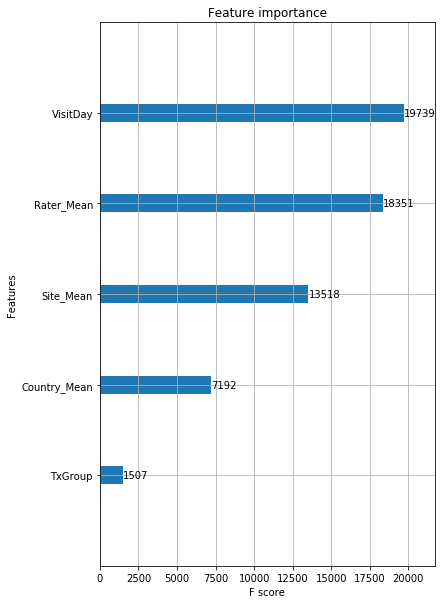

XGB score:  0.05106940200785683


In [27]:
x_train, x_test, y_train, y_test = train_test_split(datax, datay, test_size=0.20)
model = XGBClassifier()
model.fit(x_train, y_train)
# plot feature importance
ax = plot_importance(model)
fig = ax.figure
fig.set_size_inches(6, 10)
pyplot.show()
predict = model.predict(x_test)
score = model.score(x_test, y_test)
print("XGB score: ", score)

In [28]:
print(model.feature_importances_)

[0.09870482 0.31293717 0.16024704 0.2499342  0.17817678]
